<a href="https://colab.research.google.com/github/selimunal/Pytorch/blob/main/PyTorch_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
transformer_train=torchvision.transforms.Compose([
                                                  #torchvision.transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2,hue=0.2),
                                                  transforms.RandomCrop(32,padding=4),
                                                  torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                  #torchvision.transforms.RandomRotation(degrees=15),
                                                  torchvision.transforms.RandomAffine(0,translate=(0.1,0.1)),
                                                  #torchvision.transforms.RandomPerspecttive(),
                                                  transforms.ToTensor(),
]
    
)

In [ ]:
train_dataset=torchvision.datasets.CIFAR10(
    root=".",
    train=True,
    transform=transformer_train,
    download=True
)
test_dataset=torchvision.datasets.CIFAR10(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
K=len(set(train_dataset.targets))

In [ ]:
batch_size=128
train_loader=torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader=torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
#Make one for testing
train_dataset_fixed=torchvision.datasets.CIFAR10(
    root=".",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
train_loader_fixed=torch.utils.data.DataLoader(
    dataset=train_dataset_fixed,
    batch_size=batch_size,
    shuffle=False
)

Files already downloaded and verified


In [ ]:
tmp_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                       batch_size=1,
                                       shuffle=True)
for x,y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.8235, 0.8235, 0.8275,  ..., 0.6706, 0.0000, 0.0000],
          ...,
          [0.5412, 0.4078, 0.4000,  ..., 0.4078, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.8196, 0.8196, 0.8196,  ..., 0.6549, 0.0000, 0.0000],
          ...,
          [0.4941, 0.3686, 0.3569,  ..., 0.3373, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.8824, 0.8863, 0.8824,  ..., 0

In [ ]:
#Define the Model
class CNN(nn.Module):
  def __init__(self,K):
    super(CNN,self).__init__()

    #define the conv layers
    self.conv1=nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
    )
    self.conv2=nn.Sequential(
        nn.Conv2d(32,64,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64,64,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
    )
    self.conv3=nn.Sequential(
        nn.Conv2d(64,128,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128,128,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
    )

    self.fc1=nn.Linear(128*4*4,1024)
    self.fc2=nn.Linear(1024,K)
  
  def forward(self,x):
    x=self.conv1(x)
    x=self.conv2(x)
    x=self.conv3(x)
    x=x.view(x.size(0),-1)
    x=F.dropout(x,p=0.5)
    x=F.relu(self.fc1(x))
    x=F.dropout(x,p=0.2)
    x=self.fc2(x)
    return x

In [ ]:
model=CNN(K)

In [ ]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [ ]:
#loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
#A function to encapsulate the training loop
def batch_gd(model,criterion, optimizer,train_loader,test_loader,epochs):
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)

  for it in range(epochs):
    model.train()
    t0=datetime.now()
    train_loss=[]
    for inputs,targets in train_loader:
      #move data to gpu
      inputs,targets=inputs.to(device), targets.to(device)

      #print input.shape

      optimizer.zero_grad()

      #forward pass
      #print(about to get model output)

      outputs=model(inputs)
      #print("done getting model output")
      #print(outputs.shape)
      loss=criterion(outputs,targets)

      #backward and optimize
      #print("about to optimize")
      loss.backward()
      optimizer.step()
      
      train_loss.append(loss.item())

    #get train loss and test loss
    train_loss=np.mean(train_loss) #misleading

    model.eval()
    test_loss=[]
    for inputs,targets in test_loader:
      inputs,targets = inputs.to(device), targets.to(device)
      outputs=model(inputs)
      loss=criterion(outputs,targets)
      test_loss.append(loss.item())
    test_loss=np.mean(test_loss)

    #save losses
    train_losses[it]=train_loss
    test_losses[it]=test_loss

    dt=datetime.now()-t0

    print(f"Epoch {it+1}/{epochs}, train loss {train_loss:.4f}, test loss {test_loss:.4f}, duration {dt}")

  return train_losses,test_losses


In [ ]:
train_losses, test_losses=batch_gd(model,criterion,optimizer,train_loader,test_loader, epochs=50)

Epoch 1/50, train loss 1.4183, test loss 1.1468, duration 0:00:27.680666
Epoch 2/50, train loss 1.0178, test loss 0.9096, duration 0:00:24.812164
Epoch 3/50, train loss 0.8440, test loss 0.8037, duration 0:00:25.756041
Epoch 4/50, train loss 0.7508, test loss 0.7185, duration 0:00:24.798632
Epoch 5/50, train loss 0.6835, test loss 0.7507, duration 0:00:26.704117
Epoch 6/50, train loss 0.6387, test loss 0.6465, duration 0:00:25.868505
Epoch 7/50, train loss 0.6036, test loss 0.6364, duration 0:00:25.767627
Epoch 8/50, train loss 0.5690, test loss 0.5998, duration 0:00:25.060122
Epoch 9/50, train loss 0.5519, test loss 0.5632, duration 0:00:24.844007
Epoch 10/50, train loss 0.5206, test loss 0.5666, duration 0:00:24.647542
Epoch 11/50, train loss 0.5053, test loss 0.5399, duration 0:00:24.761093
Epoch 12/50, train loss 0.4919, test loss 0.5206, duration 0:00:24.946932
Epoch 13/50, train loss 0.4741, test loss 0.5476, duration 0:00:24.900207
Epoch 14/50, train loss 0.4577, test loss 0.509

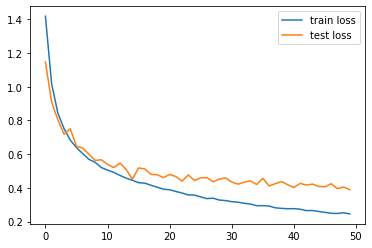

In [ ]:
#plot the train and test loss per iteration
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

In [ ]:
from torchsummary import summary
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6

In [ ]:
#accuracy
model.eval()
n_correct=0.
n_total=0.
for inputs,targets in train_loader:
  #move the data to GPU
  inputs,targets=inputs.to(device),targets.to(device)

  #forward pass
  outputs=model(inputs)

  #get prediction
  #torch.max returns bath max and argmax
  _,predictions=torch.max(outputs,1)

  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]

train_acc=n_correct/n_total


n_correct=0.
n_total=0.
for inputs,targets in test_loader:
  #move the data to GPU
  inputs,targets=inputs.to(device),targets.to(device)

  #forward pass
  outputs=model(inputs)

  #get prediction
  #torch.max returns bath max and argmax
  _,predictions=torch.max(outputs,1)

  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]

test_acc=n_correct/n_total

print(f'Train acc: {train_acc:.4f},Test acc:{test_acc:.4f}')

Train acc: 0.9237,Test acc:0.8773


In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Confusion matrix, without normalization
[[853   7  36  21  12   2   5   8  33  23]
 [  6 939   0   0   0   1   1   0  14  39]
 [ 22   2 819  30  39  37  32   8   4   7]
 [  5   2  24 760  27 122  28  18   7   7]
 [  6   0  18  27 872  28  18  29   2   0]
 [  5   1  13  87  16 848  10  18   0   2]
 [  6   3  18  26  10   9 922   3   2   1]
 [  4   1   7  23  14  36   3 905   4   3]
 [ 36  14   1   3   0   3   5   0 929   9]
 [ 12  26   1   1   1   2   1   2  11 943]]


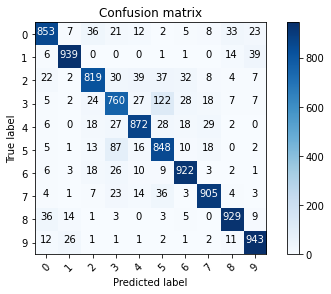

In [ ]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs,targets = inputs.to(device),targets.to(device)

  # reshape the input
  #inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  #p_test = np.concatenate((p_test, predictions.cpu().numpy()))
  p_test = np.concatenate((p_test, predictions.cpu()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
p_test[: 10000].shape

(10000,)

In [ ]:
# # get all predictions in an array and plot confusion matrix

# x_test = test_dataset.data
# y_test = test_dataset.targets
# p_test = np.array([])
# for inputs, targets in test_loader:
#   # move data to GPU
#   inputs,targets = inputs.to(device),targets.to(device)

#   # reshape the input
#   #inputs = inputs.view(-1, 784)

#   # Forward pass
#   outputs = model(inputs)

#   # Get prediction
#   _, predictions = torch.max(outputs, 1)
  
#   # update p_test
#   p_test = np.concatenate((p_test, predictions.cpu().numpy()))

# cm = confusion_matrix(y_test, p_test)
# plot_confusion_matrix(cm, list(range(10)))

In [ ]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split('\n')

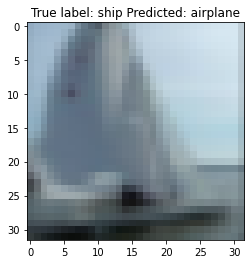

In [ ]:
# Show some misclassified examples
p_test=p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));